![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [29]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [30]:
df_san=insurance.dropna() # Drop Null values

df_san['smoker'].unique()


array(['yes', 'no'], dtype=object)

In [31]:
df_san['smoker']=df_san['smoker'].map({'yes': 1, 'no': 0})

C:\Users\SERVER\AppData\Local\Temp\ipykernel_5908\1087994078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_san['smoker']=df_san['smoker'].map({'yes': 1, 'no': 0})


In [32]:
df_san['smoker'].unique()

array([1, 0], dtype=int64)

In [34]:
df_san['sex'].unique()
MALE='male'
FEMALE='female'
sex_map = {'F':FEMALE, 'woman':FEMALE,'man':MALE, 'M':MALE}
df_san['sex']=df_san['sex'].replace(sex_map)
df_san['sex'].unique()

C:\Users\SERVER\AppData\Local\Temp\ipykernel_5908\2673229338.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_san['sex']=df_san['sex'].replace(sex_map)


array(['female', 'male'], dtype=object)

In [35]:
# Convert Smoker into boolean
df_san['smoker']=(df_san['smoker']==1)
df_san.head()

C:\Users\SERVER\AppData\Local\Temp\ipykernel_5908\2746464879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_san['smoker']=(df_san['smoker']==1)


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.924
1,18.0,male,33.770,1.0,False,Southeast,1725.5523
2,28.0,male,33.000,3.0,False,southeast,$4449.462
3,33.0,male,22.705,0.0,False,northwest,$21984.47061
4,32.0,male,28.880,0.0,False,northwest,$3866.8552


In [27]:
df_san['region']=df_san['region'].str.lower()
df_san['region'].unique()

C:\Users\SERVER\AppData\Local\Temp\ipykernel_5908\1094421829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_san['region']=df_san['region'].str.lower()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [84]:
df_san['charges']=df_san['charges'].str.strip('$').astype('float64')
df_san.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


In [87]:
# Convert charges to Positive

insurance_pos=df_san.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
insurance_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


In [88]:
insurance_pos['region']=insurance_pos['region'].str.lower()
insurance_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


In [127]:
def preprocess_dataframe(dataset):
    # df=dataset.dropna()
    df=pd.get_dummies(dataset,prefix=['region'], columns=['region'])
    df.drop(columns=['region_southeast'])
    # df['region']=dataset['region'].str.lower()
    
    #df=dataset.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
    df['smoker']=(dataset['smoker']=='yes')
    df['smoker']=df['smoker'].astype('int64')
    df['is_male']=(dataset['sex']=='male').astype('int64')
    df=df.drop(columns=['sex'])
    #df['charges']=dataset['charges'].str.strip('$').astype('float64')
    return df
    

    

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


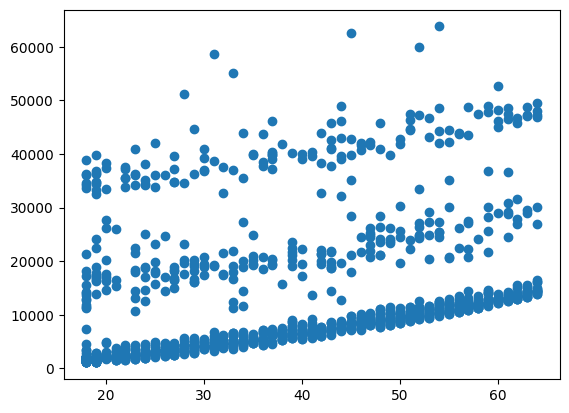

In [90]:
# Scatter plot 
import matplotlib.pyplot as plt
df=insurance_pos.copy()
df.info()
plt.scatter(df['age'],df['charges'])

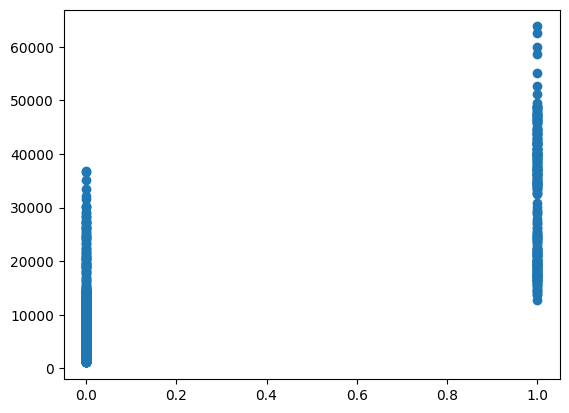

In [91]:
plt.scatter(df['smoker'],df['charges'])

In [103]:
# Dummy Encoding of Regions

df_new=pd.get_dummies(df,prefix=['region'], columns=['region'])
df_new.drop(columns=['region_southeast'])
df_new['smoker']=df_new['smoker'].astype('int64')
df_new['is_male']=(df_new['sex']=='male').astype('int64')
df_new=df_new.drop(columns=['sex'])
df_new['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1208, dtype: float64

In [104]:
# Implement model creation and training here
# Use as many cells as you need
df_new=df_new.dropna()

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=df_new.drop(columns=['charges'])
y=df_new['charges']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train Model

model=LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

# Calculate the R2 score

r2=r2_score(y_test, y_pred)
r2

0.7049323160872816

In [110]:
from sklearn.kernel_ridge import KernelRidge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train Model
model=KernelRidge()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

# Calculate the R2 score
r2=r2_score(y_test, y_pred)
r2

0.7051618974096835

In [131]:
data=pd.read_csv('validation_dataset.csv')

input_df=preprocess_dataframe(data)

predictions=model.predict(input_df)


#predictions_new=[x if x > 0 else 1000 for x in predictions]
    
validation_data=data.copy()
validation_data['predicted_charges']=predictions
validation_data.loc[validation_data['predicted_charges']< 1000 , 'predicted_charges']=1000

validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
